# 심부전증 예측 모델 개발
## 1. 데이터 프레임 각 컬럼 분석

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('content/heart_failure_clinical_records_dataset.csv')

| 컬럼명 | 설명 |
|--------|------|
| **age** | 환자의 나이 |
| **anaemia** | 환자의 빈혈증 여부 (0: 정상, 1: 빈혈) |
| **creatinine_phosphokinase** | 크레아틴키나제 검사 결과 |
| **diabetes** | 당뇨병 여부 (0: 정상, 1: 당뇨) |
| **ejection_fraction** | 박출계수 (%) |
| **high_blood_pressure** | 고혈압 여부 (0: 정상, 1: 고혈압) |
| **platelets** | 혈소판 수 (kiloplatelets/mL) |
| **serum_creatinine** | 혈중 크레아틴 레벨 (mg/dL) |
| **serum_sodium** | 혈중 나트륨 레벨 (mEq/L) |
| **sex** | 성별 (0: 여성, 1: 남성) |
| **smoking** | 흡연 여부 (0: 비흡연, 1: 흡연) |
| **time** | 관찰 기간 (일) |
| **DEATH_EVENT** | 사망 여부 (0: 생존, 1: 사망) |

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


RangeIndex: 299 entries, 0 to 298
모든 데이터는 299로 결측치 X

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 2.수치형 데이터 히스토그램
### 2 - 1. 히스토그램 - 나이 & 죽음
1. 연령대별 생존율 차이
    * 50세 이하에서는 DEATH_EVENT=1(사망)이 거의 발생하지 않음.
    * 60~80세 사이에서 사망률이 점점 증가하는 경향을 보임.
2. 생존자와 사망자의 비율 차이
    * 대부분의 연령대에서 DEATH_EVENT=0(생존)이 우세함.
    * 80세 이상에서는 DEATH_EVENT=1(사망) 비율이 상대적으로 높아짐.
3. KDE 곡선의 역할
    * KDE 곡선을 보면 연령이 증가할수록 DEATH_EVENT=1 확률이 점진적으로 증가.
    * KDE가 없으면 단순한 분포만 보이지만, KDE가 있으면 연령에 따른 패턴이 더 명확해짐.

<Axes: xlabel='age', ylabel='Count'>

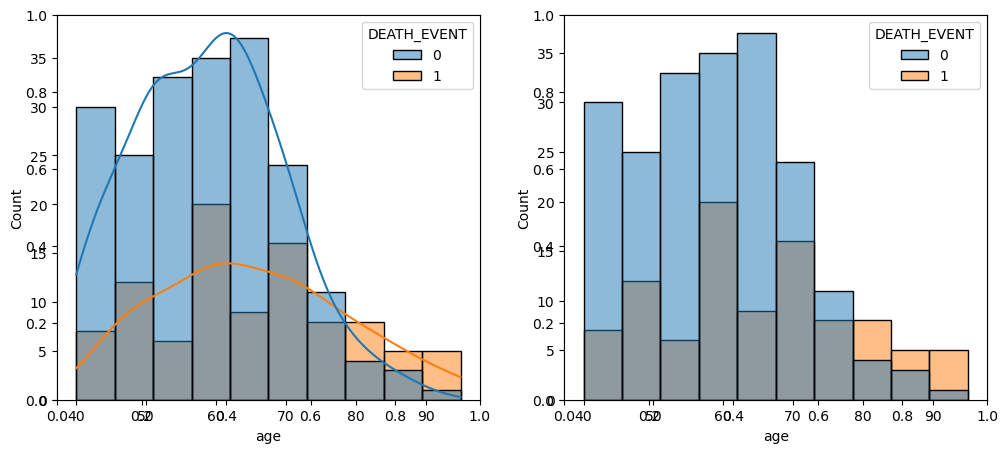

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes = fig.add_subplot(1, 2, 1)
sns.histplot(x='age' , data = df, hue= 'DEATH_EVENT' , kde = True)
axes = fig.add_subplot(1, 2, 2)
sns.histplot(x='age' , data = df, hue= 'DEATH_EVENT' , kde = False)

### 2 - 2. 히스토그램 - 박출계수(%) & 죽음

1. (좌상) 기본 히스토그램 (No options)
    * 박출계수 분포를 단순히 보여줌.
    * 대체로 30~40% 구간에 집중되어 있으며, 일부 환자는 50~60% 이상.

2. (우상) bin=13 적용
    * bin 수를 13으로 설정하여 좀 더 세분화된 분포를 보여줌.
    * 여전히 30~40% 구간에서 높은 빈도를 보임.

3. (좌하) 사망 여부별 분포(bin=13, hue=DEATH_EVENT)
    * 파란색(생존자)이 대부분이며, 주황색(사망자)은 상대적으로 적음.
    * 사망자(주황색)는 박출계수가 낮은 구간(20~40%)에 집중됨.
    * 박출계수 50% 이상에서는 사망자가 거의 없음.

4. (우하) KDE 곡선 포함(bin=13, hue=DEATH_EVENT, kde=True)
    * KDE(커널 밀도 추정)를 통해 분포의 흐름을 부드럽게 시각화.
    * 생존자의 경우 박출계수 30~40%에서 피크(최고점)를 가짐.
    * 사망자의 경우 박출계수 20~30%에서 확률이 높아짐.
    * 박출계수가 높을수록 사망 확률이 낮아지는 경향.

Text(0.5, 1.0, 'bin = 13, hue=DEATH_EVENT, kde=True')

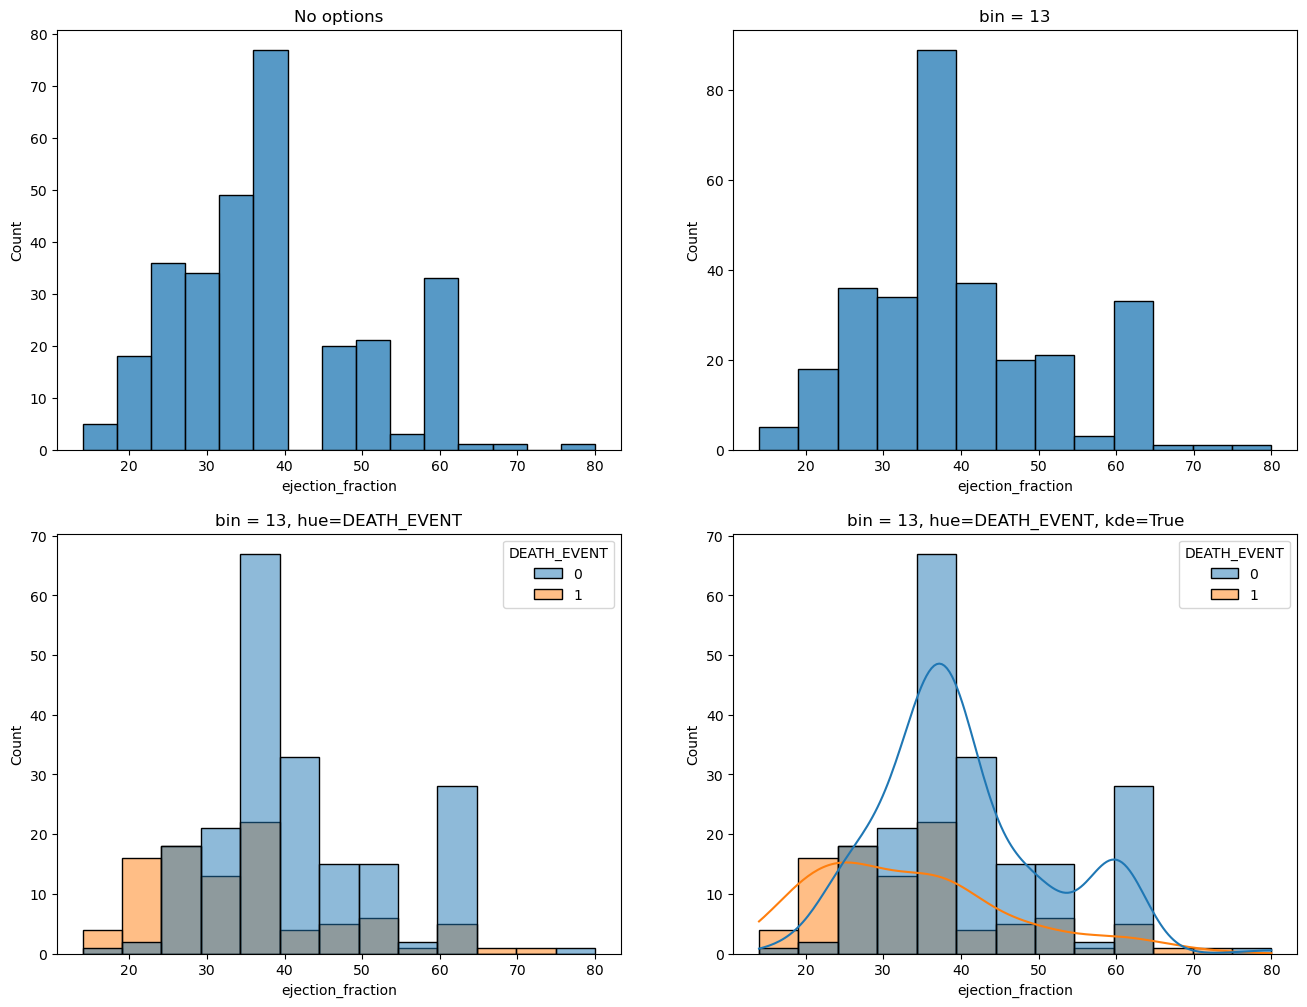

In [20]:
fig, axes = plt.subplots(2,2, figsize=(16,12) )

sns.histplot(data = df, x='ejection_fraction', ax=axes[0,0])
axes[0,0].set_title('No options')

sns.histplot(data = df, x='ejection_fraction', bins = 13 , ax=axes[0,1])
axes[0,1].set_title('bin = 13')

sns.histplot(data = df, x='ejection_fraction', bins=13 , hue = 'DEATH_EVENT',ax=axes[1,0])
axes[1,0].set_title('bin = 13, hue=DEATH_EVENT')

sns.histplot(data = df, x='ejection_fraction', bins = 13,hue = 'DEATH_EVENT', kde=True, ax=axes[1,1])
axes[1,1].set_title('bin = 13, hue=DEATH_EVENT, kde=True')

### 2 - 3. 히스토그램 - 관찰기간 & 죽음
* 초기 50일 내 사망률이 높음
* 생존자는 전 기간에 걸쳐 꾸준히 분포
* 시간이 지날수록 사망 확률 감소

<Axes: xlabel='time', ylabel='Count'>

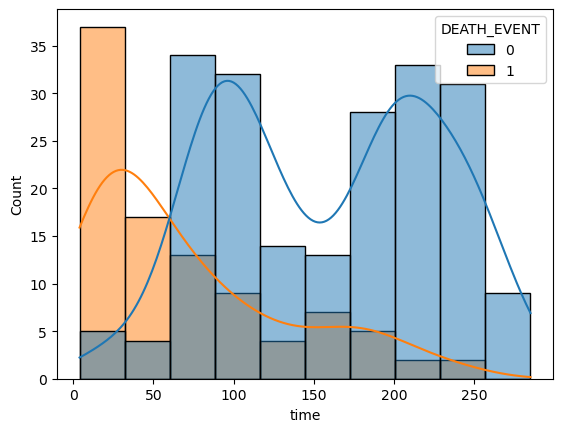

In [21]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

### 2 - 4. 조인트풀롯 혈소판 & 크레아틴키나제 사망여부 관계 분석
* 혈소판(Platelets)과 CPK는 사망 여부와 강한 연관성을 보이지 않음.
* 높은 CPK 수치에서도 생존자가 많으며, 혈소판 수치는 일정한 분포를 가짐

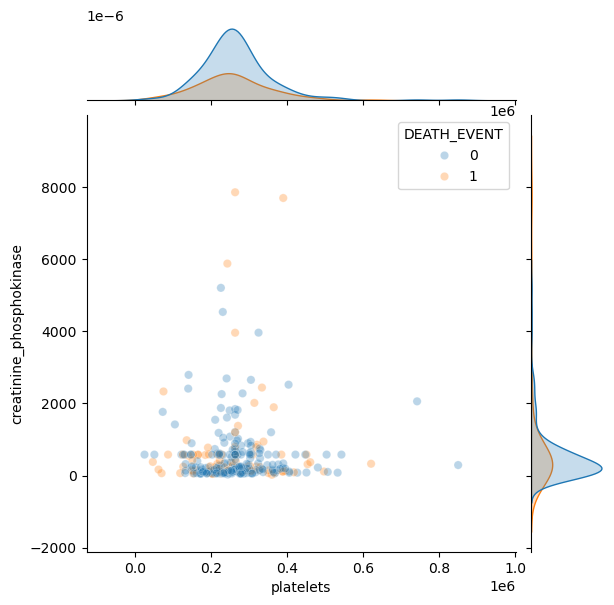

In [23]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)

### 2 - 5. 조인트 플롯 박출계수 & 혈중 크레아티닌 사망 여부 관계 분석
1. 사망자(주황색)는 혈중 크레아티닌이 높은 경우가 많음.
2. 낮은 박출계수(20~40%)에서 사망자 비율이 높음.
3. 생존자(파란색)는 박출계수가 높은 경향을 보임.

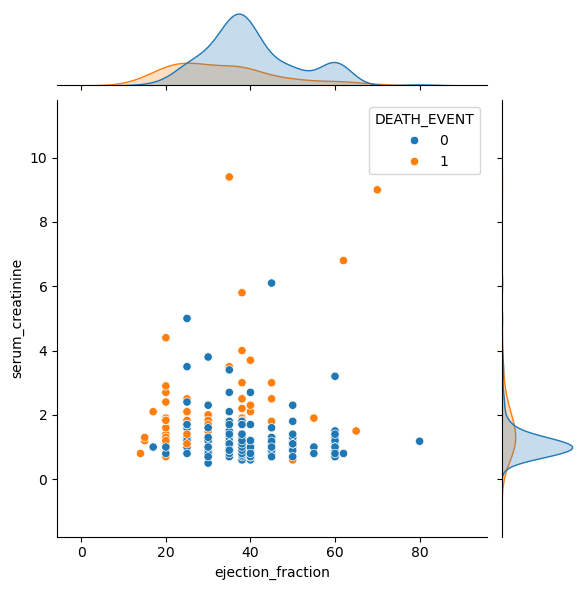

In [12]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

### 2 - 6. 박스플롯 죽음 & 박출계수 
1. 박출계수가 낮을수록 사망 위험이 증가, 특히 30% 이하에서 위험성 큼
2. 박출계수 50% 이상에서는 생존 가능성이 높아짐짐

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

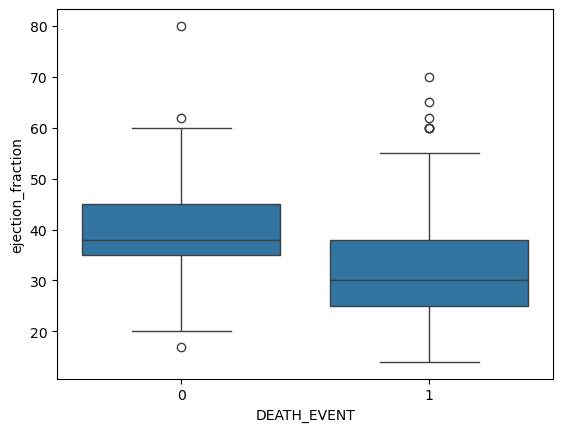

In [14]:
sns.boxplot(data = df, x = 'DEATH_EVENT', y= 'ejection_fraction')

### 2 - 7. 박스플롯 흡연여부 & 박출계수
1. 흡연자(1)와 비흡연자(0)의 박출계수 차이는 크지 않음.
    * 비흡연자 중앙값 ≈ 38%
    * 흡연자 중앙값 ≈ 35%

<Axes: xlabel='smoking', ylabel='ejection_fraction'>

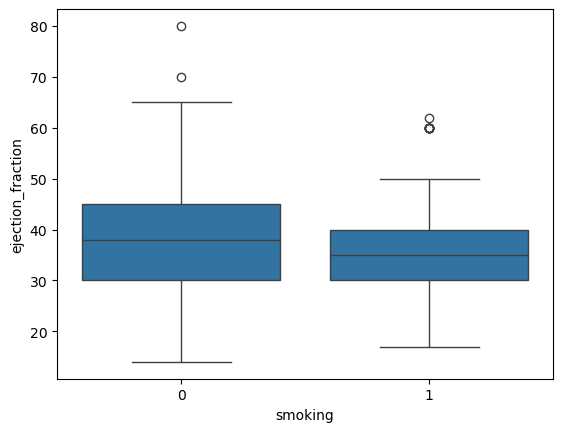

In [16]:
sns.boxplot(data = df , x = 'smoking', y='ejection_fraction')

### 2 - 8 바이올린 플롯 사망 여부와 박출계수 관계 분석
1. 사망자(빨간색)는 박출계수가 낮은 경향.
2. 생존자(파란색)는 박출계수가 높은 경향.

* 박출계수가 낮을수록(특히 30% 이하) 사망 위험 증가.
* 생존자는 박출계수가 높은 경향(40% 이상)이며, 50% 이상에서 사망자가 거의 없음.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16716\2443994392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df, palette={"0": "blue", "1": "red"})


<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

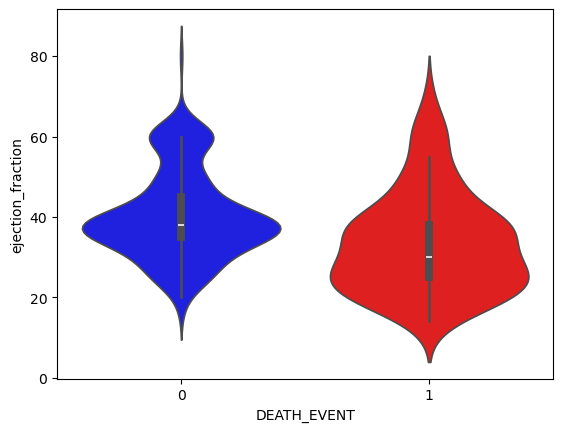

In [33]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df, palette={"0": "blue", "1": "red"})

### 2 - 9 사망 여부(Death Event), 혈소판(Platelets) & 흡연(Smoking) 관계분석(Swarmplot)
1. 혈소판 수치는 사망 여부와 뚜렷한 관계가 없어 보임.
2. 흡연 여부와 혈소판 수치의 차이도 크지 않음.
3. 사망자 그룹에서도 혈소판 수치가 크게 낮거나 높은 경향이 없음.

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

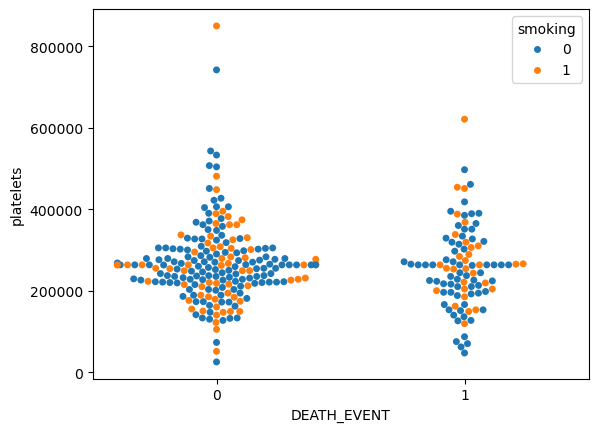

In [19]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)